<a href="https://colab.research.google.com/github/tawsif5001/brain_tumor_detection_app-using-cnn/blob/main/Deep_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 1311 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 1016s 12s/step - accuracy: 0.4683 - loss: 1.2544 - val_accuracy: 0.6911 - val_loss: 0.7571
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 927s 11s/step - accuracy: 0.7364 - loss: 0.6943 - val_accuracy: 0.7986 - val_loss: 0.5668
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 942s 11s/step - accuracy: 0.8146 - loss: 0.5677 - val_accuracy: 0.8024 - val_loss: 0.5038
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 938s 11s/step - accuracy: 0.8427 - loss: 0.4720 - val_accuracy: 0.8505 - val_loss: 0.4424
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 944s 11s/step - accuracy: 0.8623 - loss: 0.4241 - val_accuracy: 0.8406 - val_loss: 0.4276
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 957s 11s/step - accuracy: 0.8475 - loss: 0.4425 - val_accuracy: 0.8444 - val_loss: 0.4131
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 881s 11s/step - accuracy: 0.8595 - loss: 0.4189 - val_accuracy: 0.8795 - val_loss: 0.3545
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 911s 11s/step - accuracy: 0.8714 - loss: 0.3659 - val_accuracy: 0.8703 - val

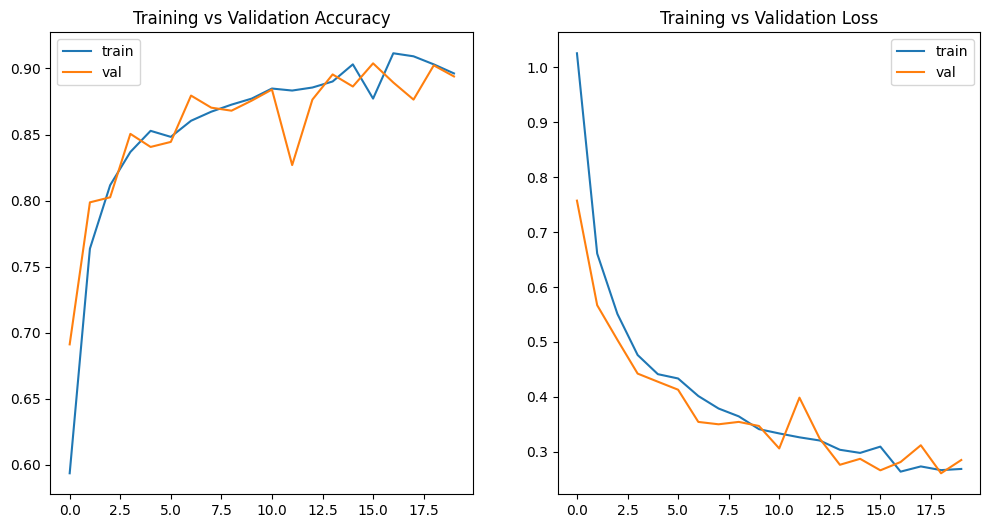

In [ ]:



import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the required libraries for loading the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify paths
train_data_path = "/content/drive/MyDrive/dataset1/train"
val_data_path = "/content/drive/MyDrive/dataset1/val"
test_data_path = "/content/drive/MyDrive/dataset1/test"

# Define image size and batch size
IMG_SIZE = (299, 299)  # Image size expected by DeepLabV3+
BATCH_SIZE = 16

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load pre-trained DeepLabV3+ model from tensorflow keras applications
base_model = tf.keras.applications.DenseNet121(input_shape=(299, 299, 3), weights='imagenet', include_top=False)
base_model.trainable = False  # Freeze the weights

# Adding custom layers for classification
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=[early_stop])

# Evaluate on test data and print test classification
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Visualize model accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Training vs Validation Loss')
plt.legend()

# Inference on new images
def predict_img(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(299, 299))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)  # Make it batch of one image
    img = img / 255.0
    prediction = model.predict(img)
    return prediction


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
